# Project 2 - Can you hear the size of a reservoir?

By Mariane Udtian, Marius Skårdal & Fisayo Togun \
Note that in this notebook, the first section is a a brief introduction of the problem. In the next section we have included all analytical solution to the mathematical nature of this problem. 3.rd section is all the codes implemented as well as plots and numerical solution. Finally, we have the discussion part as well as a short summary of what we learned throughout the project. 

### Introduction

In a time gap of many millions of years, organic material such as oil and gas has broken down and transformed on the seabed. The probability of finding oil and producable gas increases as the reservoir contains both porosity and permeability. The first referce to small cavities in the rock that can be filled with oil, gas as well as water. The second can be defined as a measure of how easily fluids flow through the rock. In this project we will investigate the behavior of fluid inside a reservoir. As mass, electric charge and energy is conserved, we will start by introducing the one-dimensional continuity equation:

$$\frac{\partial q(x, t)}{\partial t} A(x) =  - \frac{\partial(J(x, t)A(x))}{\partial x} + \dot{\sigma}(x, t)A(x)$$

In the rest of the project, we will also need the given boundary conditions:
$$\frac{\partial p}{\partial t} = \eta \frac{e^{-2y}}{r^2_w} \frac{\partial^2 p}{\partial y^2}$$
$$\frac{\partial p}{\partial y}(y=y_e) = \frac{Q \mu}{2 \pi hk}$$
$$p(y=y_e) = p_{init}$$ \

In the first part of this project we will investigate a time independent stedy state, which furthermore leads us to a linear analytical solution for the pressure. Using the given boundary condition combined with Taylor´s formula for finite difference, we achive a set of linear equations which describes the pressure at sertain radii r. Taylor expansion is then used to determine the truncation error for the pressure. Furthermore we improve our model by introducing the time dependancy. Here we assume compressable fluid inside the reservoir, which implies that pressure changes as a function of time. Note that all our models are compared with input several values for the grid size. Typically, higher value of grid points yield a higher accuracy as we are able to estimate the pressure from several input points in the reservoir. Our numerical implemented model is then compared to a given line-source solution: 
$$p(r, t) = p_i + \frac{Q \mu}{4 \pi kh} \cdot \mathcal{W}(-\frac{r^2}{4 \eta t})$$ where $\mathcal{W}$ is the exponential function, defined in terms of the integral:
$$\mathcal{W}(x) = \int_{-\infty}^{x} \frac{e^u}{u}du$$
A simulator that choose between three different matrix solvers, is also included to compare the speed of each solver using %timeit. The matrix solvers are: numpy.linalg.solve, scipy.sparse.linalg.spsolve and thomas algorithm. In the very last part of the project, we compare both the numerical solution and the line-source solution with data from a well test. Based on the calculated value of $r_e$, a final estimate of the total volume of water in the reservoir is determined.

## Exercise 1 - Steady-state solution

### Part 1

In this problem we are dealing with steady states, which means no change in pressure: $$\frac{dP}{dt}=0$$. This implies that the first equation $$\frac{\partial P}{\partial t} = \eta \frac{e^{-2y}}{r^2_w} \frac{\partial^2 P}{\partial y^2} \rightarrow \frac{\partial^2 P}{\partial y^2} = 0$$

2.nd equation is: $$\frac{dP}{dy}|_{y=y_w} = \frac{Q \mu}{2 \pi h k} \equiv \alpha$$
We also know that $$P(y=y_e)=P_{initial}$$

$$  p(y) = A \cdot y + B, (P''(y)=0)$$

$$ P(ye)=p_{init}, \frac{dp}{dy}|_{y=y_w}  \alpha \rightarrow
  P'(y)=A \\    
  P(y_w)= \alpha = A $$
$$ p(y) = \alpha \cdot y + B \newline
   p(ye) = P_i= \alpha \cdot ye + B \newline
   B = P_i - \alpha \cdot ye \newline
   p(y) = \alpha \cdot y + P_i - \alpha \cdot ye = P_i + \alpha(y-ye)
$$

$$\rightarrow p(y) = p_{init} + \alpha (y - y_e)$$

### Part 2

Given in the exercise, we know that $$\frac{d^2 P}{dy^2}=0$$
Thats is, according to Taylor 2.nd order finite difference scheme:
$$\frac{P_{i+1} + P_{i-1} - 2P_i}{\Delta y^2} = 0$$
To enforce fixed pressure: $p_e = p(y_e) = p_{init}$

According to the "lazy" implementation, $p_N = p_e$, where N=4. Using the formula above we get:
$$i=0:   p_1+p_{-1}-2p_0= 0$$
$$i=1:   p_2+p_{0}-2p_1= 0$$
$$i=2:   p_3+p_{1}-2p_2= 0$$
$$i=3:   p_4+p_{2}-2p_2= 0$$
Here, since we know $p_4$ we can re arrange the last equation : $p_2-p_3=-p_e$

We also know the 1.st derivative: $$\frac{dP}{dy}|_{y_w} = \alpha$$.
Taylor 1.st order finite difference read: $$\frac{P_{i}-P_{i-1}}{\Delta y} = \alpha$$
For the first value we get $$i=0: \frac{p_0-p_{-1}}{\Delta y}=\alpha \rightarrow p_{-1} = p_0 - \alpha \Delta y$$

Now, if we put this into equation () we get $$p_1+(p_0- \alpha \Delta y) - 2p_0 = 0 \rightarrow -p_0 + p_1 = \alpha \Delta y$$

Putting all the information above we get the tridiagonal matrix:
$$
\begin{bmatrix}
-1 & 1 & 0 & 0\\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -2
\end{bmatrix}
= 
\begin{bmatrix}
p_0\\
p_1\\
p_2\\
p_3
\end{bmatrix}
= 
\begin{bmatrix}
\alpha \Delta y\\
0\\
0\\
-p_e
\end{bmatrix}
$$

### Part 3

First of all, the truncation error is the ratio between the approximation and the exact value. A truncation error of 1 therefore indicates no error. The local truncation error for the $$\frac{P_{i+1} + P_{i-1} - 2P_i}{\Delta y^2} = 0$$ is : $$ T_i = \frac{P_{i+1}+ P_{i-1} - 2P_i}{\Delta y^2} - \frac{\partial^2 P}{\partial y^2}|_{y=y_i}$$
For the truncation error at the interior grid, we want to look at the truncation error at $P_i$.

Now, if we use taylor expansion: $$f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \frac{f'''(x_0)}{3!}({x-x_0})^3 + \frac{f''''(x_0)}{4!}({x-x_0})^4 + ... = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$


$$f(y_{i+1}) + f(y_{i-1}) - 2f(y_i) = f'(y_0)[\Delta y - \Delta y] + f''(y_0)[\frac{(\Delta y)^2}{2!} + \frac{(\Delta y)^2}{2!}] + f'''(y_0)[\frac{(\Delta y)^3}{3!} + \frac{(\Delta y)^3}{3!}] + f''''(y_0)[\frac{(\Delta y)^4}{4!} + \frac{(\Delta y)^4}{4!}] + f^{(5)}(0) + f^{(6)}(y_0)[\frac{(\Delta y)^6}{6!} + \frac{(\Delta y)^6}{6!}] +...$$ 

Re arrange the equation and we have:
$$f´´(y) = \frac{f(y_{i+1}) + f(y_{i-1}) - 2f(y_i)}{\Delta y^2} + f^{(3)}(y)[\frac{(\Delta y)^2}{12}] + f^{(5)}(y)[\frac{(\Delta y)^6}{360}]...$$ \\
$$f´´(y) = \frac{f(y_{i+1}) + f(y_{i-1}) - 2f(y_i)}{\Delta y^2} + O((\Delta y)^2)$$ 
Where $$f^{(3)}(y)[\frac{(\Delta y)^2}{12}]\rightarrow \frac{d^3P}{dy^3} \frac{\Delta y^2}{12}$$ is the truncation error. Note that I skipped the terms after $f^{(3)} $, this is because they are really small, and in most cases don´t make a differance. Note that this is a general formula for the truncation error for the finite difference. The truncation error for both forward and backward difference is scaled as $O((\Delta y)^2)$, wheras for central difference we have $O((\Delta y)^4)$

Now, according to the taylor expansion, the truncation error is given by the third derivative. Accordingliy, we are dealing with a linear function, so the third derivative is zero. Also, we were given that the 2.nd derivative is 0, therefore we know that the higher order derivatives is zero. 

### Part 4

$\cdot$ According to the result found in part 3, one cann see that the numerical error for the "lazy" approximation scales as $O((\Delta y)^2)$. 

$\cdot$ For the "not-so-lazy" version we want to use taylors formula to derive the boundary condition: $$p_N=2p_e - p_{N-1}$$
Looking at figure 4 and 5, we see that $p_e$ is on the edge the cylindrical reservoir, and found in between of $p_3$ and $p_4$. The distance from $p_e$ to $p_3$ and $p_4$ is given by $\frac{\Delta y}{2}$. Now, if we combain this information with Taylor´s formula, we get:
$$P(y_e + \frac{\Delta y}{2}) = P(y_e) + \frac{dP}{dy}|_{y_e} \frac{\Delta y}{2}$$ 
Note that the left-hand-term is equal to $P_4$, and $P(y_e)=P_e$. Again, using first order finite difference : $\frac{P_{i}-P_{i-1}}{\Delta y}$ for the N=4:
$$P_4 = P_e + \frac{P_{4}-P_{3}} {\Delta y} \frac{\Delta y}{2} = P_e + \frac{P_{4}-P_{3}}{2} \rightarrow \frac{1}{2}P_4 = P_e - \frac{1}{2}P_3 \newline \rightarrow P_4 = 2P_e - P_3$$

It is worth knowing that the accuracy of all computed derivatives can be improved by using a smaller step size, or using a higher accuracy formula. The not so lazy approximation implies a smaller step size in order to achive higher accuracy. 

In order to find the new matrix element, we will plug the "not-so-lazy" method into the 2.nd finite difference formula:$\newline$
i=3:  $$p_4 + p_2 - 2p_3 = 2p_e -p_3 + p_2 = 0 \rightarrow p_2 - 3p_3 = -2p_e$$

The matrix equation we now need to solve for the "not-so-lazy" approch is:
$$
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -3  \\
\end{bmatrix}
= 
\begin{bmatrix}
p_0\\
p_1\\
p_2\\
p_3
\end{bmatrix}
= 
\begin{bmatrix}
\alpha \Delta y\\
0\\
0\\
-2p_e
\end{bmatrix}
$$

## Exercise 2: Time-dependent solution
### Part 1

$$
\frac{p^{n+1}_{i}-p^n_i}{\Delta t} \: = \: \eta \: \cdot \: \frac{e^{-2y_i}}{r^2_w} \: \cdot \: \frac{p^{n+1}_{i+1}+p^{n+1}_{i-1}-2p^{n+1}_{i}}{\Delta y^2} 
$$

$$
p'(y) \: = \: \frac{p_{i+1}-p_i}{\Delta y}
$$
Now we need to see if we can apply our boundary conditions
$$
\xi_i \: = \: \frac{\eta e^{-2y_i}\Delta t}{r^2_w \Delta y^2}
$$
$$
\beta \: = \: \frac{Q \mu \Delta y}{2 \pi kh}
$$
$$
\frac{p^{n+1}_{i}-p^n_i}{\Delta t} \: = \: \eta \: \cdot \: \frac{e^{-2y_i}}{r^2_w} \: \cdot \: \frac{p^{n+1}_{i+1}+p^{n+1}_{i-1}-2p^{n+1}_{i}}{\Delta y^2} 
$$
$$
\rightarrow p^{n+1}_{i}-p^n_i \: = \: \eta \: \cdot \: \frac{e^{-2y_i}\Delta t}{r^2_w \Delta y^2} \: \cdot \: p^{n+1}_{i+1}+p^{n+1}_{i-1}-2p^{n+1}_{i} 
$$
$$
\rightarrow p^{n+1}_{i}-p^n_i \: = \: \xi_i \: \cdot \: (p^{n+1}_{i+1}+p^{n+1}_{i-1}-2p^{n+1}_{i})
$$
$N \: = 0 \:$

$$
p^{n+1}_{0}-p^n_0 \: = \: \xi_0 \: \cdot \: (p^{n+1}_{1}+p^{n+1}_{-1}-2p^{n+1}_{0})
$$
$$
\frac{p_0-p_{-1}}{\Delta y} \: = \: \alpha
$$
$$
p_0-p_{-1} \: = \: \beta 
$$
$$
p^{n+1}_0-p^n_0 \: = \: \xi_0 (p^{n+1}_1+p^{n+1}_{-1}-p^{n+1}_{0}-p^{n+1}_{0})
$$
$$
p^{n+1}_0-p^n_0 \: = \: \xi_0 (p^{n+1}_1-\beta-p^{n+1}_{0})
$$
$$
p^{n+1}_0-p^n_0 \: = \:  \xi_0p^{n+1}_1-\xi_0\beta-\xi_0p^{n+1}_{0}
$$
$$
-p^n_0 \: = \:  \xi_0p^{n+1}_1-\xi_0\beta-\xi_0p^{n+1}_{0}-p^{n+1}_0
$$
$$
-p^n_0 \: = \:  \xi_0p^{n+1}_1-\xi_0\beta-p^{n+1}_0(\xi_0+1)
$$
$$
p^n_0-\xi_0\beta \: = \:  p^{n+1}_0(\xi_0+1)-\xi_0p^{n+1}_1
$$
N=1
$$
p^{n+1}_{1}-p^n_1 \: = \: \xi_1 \: \cdot \: (p^{n+1}_{2}+p^{n+1}_{0}-2p^{n+1}_{1})
$$
$$
 p^{n+1}_{1}-p^n_1 \: = \: \xi_1 p^{n+1}_{2}+\xi_1 p^{n+1}_{0}-\xi_1 2p^{n+1}_{1}
$$
$$
-p^n_1 \: = \: \xi_1 p^{n+1}_{2}+\xi_1 p^{n+1}_{0}-\xi_1 2p^{n+1}_{1} - p^{n+1}_{1}
$$
$$
 p^n_1 \: = \: -\xi_1 p^{n+1}_{0}+p^{n+1}_{1}(1+2\xi_1) -\xi_1 p^{n+1}_{2}
$$
N=2
$$
p^{n+1}_{2}-p^n_2 \: = \: \xi_2 \: \cdot \: (p^{n+1}_{3}+p^{n+1}_{1}-2p^{n+1}_{2})
$$
$$
p^{n+1}_{2}-p^n_2 \: = \: \xi_2 p^{n+1}_{3}+\xi_2p^{n+1}_{1}-\xi_2 2p^{n+1}_{2}
$$
$$
-p^n_2 \: = \: \xi_2 p^{n+1}_{3}+\xi_2p^{n+1}_{1}-\xi_2 2p^{n+1}_{2} - p^{n+1}_{2}
$$
$$
p^n_2 \: = \:-\xi_2p^{n+1}_{1} + p^{n+1}_{2}(1+2\xi_2) -\xi_2 p^{n+1}_{3}
$$
N=3
$$
p^{n+1}_{3}-p^n_3 \: = \: \xi_3 \: \cdot \: (p^{n+1}_{4}+p^{n+1}_{2}-2p^{n+1}_{3})
$$
Implement the "not so lazy" solution
$$
p_N \: = 2p_i - p_{N-1} \rightarrow 
p_4 \: = 2p_i - p_{3}
$$
$$
p^{n+1}_{3}-p^n_3 \: = \: \xi_3 \: \cdot \: (2p_i - p^{n+1}_{3}+p^{n+1}_{2}-2p^{n+1}_{3})
$$
$$
p^{n+1}_{3}-p^n_3 \: = \: \xi_3 2p_i +\xi_3p^{n+1}_{2}-3\xi_3 p^{n+1}_{3}
$$
$$
-p^n_3 \: = \: \xi_3 2p_i +\xi_3p^{n+1}_{2}-3\xi_3 p^{n+1}_{3} - p^{n+1}_{3}
$$
$$
p^n_3 \: = \: -\xi_3 2p_i -\xi_3p^{n+1}_{2}+p^{n+1}_{3}(1+3\xi_3)
$$
$$
p^n_3 + 2p_i\xi_{N-1} \: = \: -\xi_3p^{n+1}_{2}+p^{n+1}_{3}(1+3\xi_3)
$$
Which gives us the matrix
$$
\begin{bmatrix}
1+\xi_0 & -\xi_0 & 0 & 0\\
-\xi_1 & 1+2\xi_1 & -\xi_1 & 0 \\
0 & -\xi_2 & 1+2\xi_2 & -\xi_2 \\
0 & 0 & -\xi_3 & 1+3\xi
\end{bmatrix}
\begin{bmatrix}
p^{n+1}_0\\
p^{n+1}_1\\
p^{n+1}_2\\
p^{n+1}_3
\end{bmatrix}
= 
\begin{bmatrix}
p^{n}_0\\
p^{n}_1\\
p^{n}_2\\
p^{n}_3
\end{bmatrix}
+
\begin{bmatrix}
-\beta \xi_0\\
0\\
0\\
2p_i\xi_{N_1}
\end{bmatrix}
$$



### Exercise 3: Accuracy and performance of time-dependent solution
### Optional - part 3
In numerical method, when the true solution is unknown, one may quantify errors using approximate values.\
Approximate error = present approximation – previous approximation \
This is used when we have an iterative process, and an approximate value is given at the end of each value. \
relative approximate error  = approximate error / present approximation \
Here we will use both equation to investigate the approximated error. 

## Exercise 4: Match model to well test data 
### Part 1

$$P(\frac{\Delta y}{2}) = P(e) + \frac{dP}{dy}|_{y=r_w}\frac{\Delta y}{2} \rightarrow $$ \
$$P_0 = P_w + \frac{P_0 - P_{-1}}{\Delta y} \cdot \frac{\Delta y}{2} \rightarrow $$ \
$$\frac{dP}{dy}|_{y=y_w} = \frac{P_0 - P_w}{\Delta y/2} = \frac{Q \mu}{2 \pi hk} =r_w$$
$$P_0 = P_w + r_w\frac{\Delta y}{2} \rightarrow P_0 = P_w - r_w\frac{\Delta y}{2}$$

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym
import scipy.sparse.linalg
from scipy.misc import derivative
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import scipy.special as sc
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
%matplotlib inline

In [45]:
class Project:
    def __init__(self,
                 N,
                 dt,
                 typ="sparse",
                 tfinal=.1,
                 rw=0.318,
                 re=1000.0,
                 h=11.0,
                 phi=0.25,
                 mu=1.0,
                 ct=7.8e-6,
                 Q=1000.0,
                 k=500,
                 pint=3900):
        

            # Unit conversion factors (input units --> SI)
            self.ft_to_m_ = 0.3048
            self.psi_to_pa_ = 6894.75729
            self.day_to_sec_ = 24.*60.*60.
            self.bbl_to_m3_ = 0.1589873

            # Grid
            self.N_ = N
            self.rw_ = rw*self.ft_to_m_
            self.re_ = re*self.ft_to_m_
            self.h_ = h*self.ft_to_m_
            self.n = N-1
            self.tfinal=tfinal*self.day_to_sec_

            # Rock and fluid properties
            self.k_ = k*1e-15 / 1.01325
            self.phi_ = phi
            self.mu_ = mu*1e-3
            self.ct_ = ct / self.psi_to_pa_

            # Initial and boundary conditions
            self.Q_ = Q*self.bbl_to_m3_ / self.day_to_sec_
            self.pi_ = pint*self.psi_to_pa_

            # Time control for simulation
            self.dt_ = dt*self.day_to_sec_
            self.diffusivity_ = self.k_/(self.mu_*self.phi_*self.ct_)
            self.ye=np.log(self.re_/self.rw_)
            self.dy=self.ye/self.N_
            self.beta_ = (self.Q_*self.mu_*self.dy)/(2*np.pi*self.k_*self.h_)
            self.alph= (self.Q_*self.mu_)/(2*np.pi*self.k_*self.h_)
            self.const = (self.Q_*self.mu_)/(4*np.pi*self.k_*self.h_)

            #extra
            self.yi=np.linspace(0,self.ye-self.dy,self.N_)+(self.dy/2)
            #self.r=np.linspace(0,self.re_,self.N_)
            self.r=self.rw_*np.exp(self.yi)
            self.alpha=1
            self.y_gen=np.linspace(0,stop=self.ye,num=1000)
            self.gen2=np.linspace(start=0,stop=self.ye,num=self.N_+1)
            self.y_i2=(self.gen2[0]+self.gen2[1])/2
            self.y2 = np.linspace(self.dy/2, self.ye-self.dy/2, num=self.N_)
            
            #matrix variables for basic
            self.typ=typ
            self.matrix, self.d=self.matrixsolver()
            self.a,self.b,self.c=self.matrixsolver2()
            
#Define analytical solution             
    def analytic(self, y_gen):
        p_y=self.pi_+(self.alpha*(y_gen-self.ye))
        return p_y
#Def lazy approximation
    def lazy(self):
        a= np.ones(self.N_-1)
        b= np.repeat(-2, self.N_)
        c= np.ones(self.N_-1)
        d=np.ones(self.N_-1)
        b[0]=-1
        A=np.diag(a,k=-1)+np.diag(b,k=0)+np.diag(c,k=1)
        
        b = np.zeros(self.N_)
        b[0]= self.alpha*self.dy
        b[1:-1] = 0
        b[-1] = -self.pi_
        return (np.linalg.solve(A, b))
#Def not-so-lazy approximation
    def not_so_lazy(self):
        a2= np.ones(self.N_-1)
        b2= np.repeat(-2, self.N_)
        c2= np.ones(self.N_-1)
        d2=np.ones(self.N_-1)
        
        b2[0]=-1
        b2[-1]=-3
        A2=np.diag(a2,k=-1)+np.diag(b2,k=0)+np.diag(c2,k=1)
        
        b2 = np.zeros(self.N_)
        b2[0]= self.alpha*self.dy
        b2[-1] = -2*self.pi_
        return (np.linalg.solve(A2, b2))
#Absolute error, lazy and analytical        
    def error_l(self):
        ab1=self.lazy()
        ab2=self.analytic(self.y2)
        abs_err=abs(ab1 - ab2)
        return abs_err  
    
#Plot lazy, not so lazy with the analytical solution
    def plot(self):
        r_a=self.rw_*np.exp(self.y_gen)
        p_y=self.analytic(self.y_gen)
        B1=self.lazy()
        B2=self.not_so_lazy()
        plt.figure(facecolor='w')
        r=self.rw_*np.exp(self.y2)
        plt.plot(r_a, p_y, label='analytical')
        plt.scatter(r, B1, label='lazy approx')
        plt.scatter(r, B2, label='not so lazy')
        plt.ylabel("Pressure")
        plt.xlabel("Distance r")
        plt.title(self.N_)
        plt.legend()
        plt.grid()
        
#Variabel xi, used in time dependent solution
    def xi(self,i):
        xi2=(self.diffusivity_*((np.exp(-2*self.yi[i]))*self.dt_))/(self.rw_*self.rw_*self.dy*self.dy)
        return(xi2)

#Def time dependent matrix element    
    def matrixsolver(self):
        d=np.zeros(self.n+1)
        #for i in range(1, self.n+1):
        d[0]= -self.beta_*self.xi(0)
        d[1:-1] = 0
        d[-1] = 2*self.pi_*self.xi(self.N_-1)
        A = np.zeros((self.n+1, self.n+1))
        A[0, 0] = 1+self.xi(0)
        A[0, 1] = -self.xi(0)
        A[self.n, self.n-1] = -self.xi(self.n)
        A[self.n, self.n] = 1+3*self.xi(self.n)
        for i in range(1, self.n):
            A[i, i-1] = -self.xi(i)
            A[i, i] = 1+2*self.xi(i)
            A[i, i+1] = -self.xi(i)
        ############for basic matrix
        return(A,d) 
#Define a function that solves the time dependent matrix system for given input values    
    def time_dep_solver(self):
        #Solve linear matrix equation, np.linalg
        AA=self.matrixsolver()[0]
        bb=self.matrixsolver()[1]
        y_time=np.linalg.solve(AA, bb)
        return y_time
    
#Plot for the time dependent solution with the distance r_w*e^y   
    def plot_ts(self):
        r=self.rw_*np.exp(self.y2)
        gg=self.time_dep_solver()
        plt.plot(r, gg, label= self.N_)
        plt.title('Time dependent solution')
        plt.legend()
        plt.grid()
#Approximated error        
    def approx_err(self):
        ok=self.time_dep_solver()[-1]-self.time_dep_solver()[-2] #Last value - preveous value
        return ok
#Relative approximated error     
    def approx_rel(self):
        vy=self.approx_err()/self.time_dep_solver()[-1]
        return vy
    
#Thomas Algorithm given in the excercise file    
    #@nb.jit(nopython=True)
    def thomas_algorithm(self,l, d, u, r):
    
        # Allocate memory for solution
        solution = np.zeros_like(d)
        n = len(solution)

        # Forward elimination
        for k in range(1, n):
            xmult = l[k] / d[k-1]
            d[k] = d[k] - xmult*u[k-1]
            r[k] = r[k] - xmult*r[k-1]

        # Back-substitution
        solution[n-1] = r[n-1] / d[n-1]
        for k in range(n-2, -1, -1):
            solution[k] = (r[k]-u[k]*solution[k+1])/d[k]

        return solution

    def matrixsolver2(self):
        i=np.arange(self.N_)
        f= -self.xi(i)
        g= 1+((2)*(self.xi(i)))
        g[0]=1+((self.xi(0)))
        g[-1]= 1+((3)*(self.xi(-1)))
        h= -self.xi(i)
        return(f,g,h)

    def time_solver(self,p_old):
        rhs=p_old+self.d
        if self.typ=="sparse":
            A_sparse = csc_matrix(np.matrix(self.matrix))
            return scipy.sparse.linalg.spsolve(A_sparse,rhs)
        elif self.typ=="numpy":
            return np.linalg.solve(self.matrix,rhs)
        elif self.typ=="thomas":
            return (self.thomas_algorithm(np.copy(self.a),np.copy(self.b),np.copy(self.c),rhs))


    def pressure_solver(self,plot=True):
        p_old=np.repeat(self.pi_,self.N_)
        self.t=0
        while self.t <= self.tfinal:
            p_new=self.time_solver(p_old)
            self.t = self.t+self.dt_
            p_old=p_new
    
        if plot:
            line_eq=self.pi_+self.const*sc.expi(-(self.r*self.r)/(4*self.diffusivity_*self.tfinal))
            plt.plot(self.r,p_new, label='Numerical')######manipulate r to have same distance as p_new
            plt.plot(self.r,line_eq,'*', label='Line-source' )
            plt.title("Line-source vs numerical solver")
            plt.ylabel("Pressure")
            plt.xlabel("Distance r")
            plt.legend()
            plt.grid()
            #plt.scatter(self.r,line_eq,'*' )######edgecolors="red"
            plt.show()
            plt.close()
        print((p_new[0]-line_eq[0])/self.psi_to_pa_)
        
#calculate the well pressure as a function of the well-block pressure
    def plot_well(self,plot_well=True):
        
        p_old=np.repeat(self.pi_,self.N_)
        self.t=0
        p_w=np.array(self.pi_)
        while self.t <= self.tfinal:
            p_new=self.time_solver(p_old)
            p_old=p_new
            self.t = self.t+self.dt_
            p_0=p_old[0]
            pcreate = p_0-((self.dy/2)*self.rw_)
            p_w=np.append(p_w,pcreate)
        

        if plot_well:
            df = pd.read_csv('well_bhp.dat')
            wd= list(df.applymap(lambda x: x.split("\t")).values.flatten())
            fg=np.array(wd,dtype=float)
            ####time and pw for plot
            time_plot=np.linspace(0,(self.t/3600),len(p_w))
            press_well_numerical=(p_w/self.psi_to_pa_)
            ####pw from line equation
            press_line=(self.pi_)+self.const*sc.expi(-(self.r[0]*self.r[0])/(4*self.diffusivity_*time_plot))
            #pw_line=press_line-((self.dy/2)*self.rw_)
            pw_line=press_line-((self.dy/2)*self.alph)
            press_well_analytical=(pw_line/self.psi_to_pa_)-243

            plt.plot(fg[:,:-1],fg[:,1:], '*',label='well data')
            plt.plot(time_plot,press_well_numerical, label='numerical method',color="red")
            plt.plot(time_plot,press_well_analytical,label='line equation', color="green")
            #plt.scatter(well_pressure)
            plt.grid()
            plt.xscale("log")
            plt.xlabel("Time in the logarithmic scale")
            plt.ylabel("Well pressure")
            plt.legend()
            plt.show()

### Exercise 1, part 5

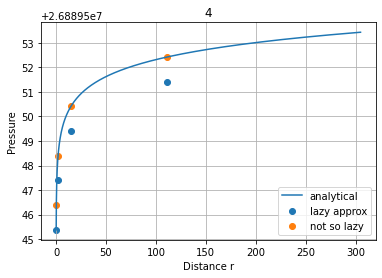

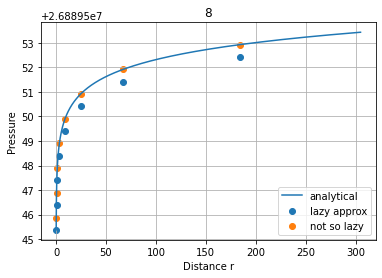

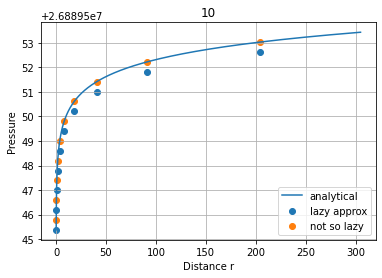

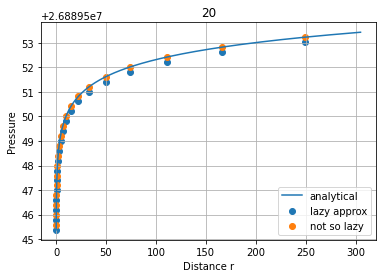

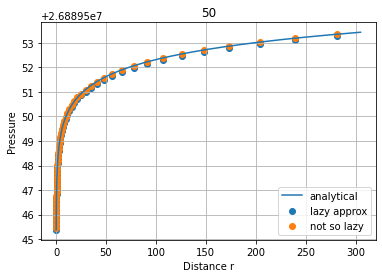

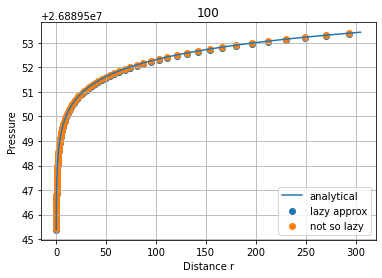

In [22]:
#Compare the lazy method and the not so lazy method against the analytical solution, with different grid points
N=[4, 8, 10, 20, 50, 100]

for i in N:
    f=Project(i, dt=0.01)
    f.plot()

According to the plot, one can see that the lazy approximation is a little off from the analytical solution for small grid points. The not so lazy approximatio on the other hand seems to be in good agreement with the analytical solition, even for smaller values of grid points. Incresing the value of gridpoints, seems to improve both approximation. Over all, the not so lazy approximation seems to be a good fit with the analytical solution. Also, note the distance between the dots for the numerical solution. Our model implies that we have a rapid increase of the pressure at small distances, r, before the pressure flattens out for higher distances, r.  

In [23]:
yk=Project(4, 0.1)
q=yk.not_so_lazy() #/6894.75729
Project(4, 0.1).analytic(0)

26889545.377540823

0.33556079119443893
0.11185359209775925
0.03728440776467323
0.012428052723407745
0.004142601042985916
0.001384001225233078


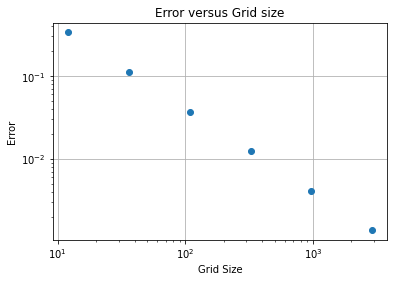

In [24]:
N=[4*3**i for i in range(1,7)]
err=[]
ii=1
for i in N:
    f=Project(i, dt=0.01)
    e=f.error_l()
    print(e[ii])
    err.append(e[ii])
    ii = int(i/3)
plt.plot(N,err, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Error versus Grid size")
plt.xlabel("Grid Size")
plt.ylabel("Error")
plt.grid()

In this plot, we compare the numerical error for the lazy method at a certin point in the resservoir. The "not so lazy" approximation is not included in this plot, as the numerical error is too close to 0. According to our model, the numerical error scales as a factor of 10. The minimum point corresponds to the minimum error achived with the corresponding grid size. The erros scales linear which is to be expected. From error analysis we know that the error $\epsilon$ can be written as $\epsilon = c \cdot \Delta y^p$ where $\Delta y = L/N \rightarrow \epsilon = c \frac{L^p}{N^p}$. Taking log on both sides implies: $log \epsilon = log(c) + p \cdot log(\Delta y)$

### Exercise 2: Time-dependent solution

In [25]:
#For N=4, and delta t=0.01, the matrix element for the time-dependent solution is:
testings=Project(4, 0.01)
Ax=testings.matrixsolver()[0]
print(Ax)

[[ 5.28702460e+03 -5.28602460e+03  0.00000000e+00  0.00000000e+00]
 [-9.42633218e+01  1.89526644e+02 -9.42633218e+01  0.00000000e+00]
 [ 0.00000000e+00 -1.68095582e+00  4.36191165e+00 -1.68095582e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.99757363e-02  1.08992721e+00]]


In [26]:
#Solve the time-dependent matrix for different input-values

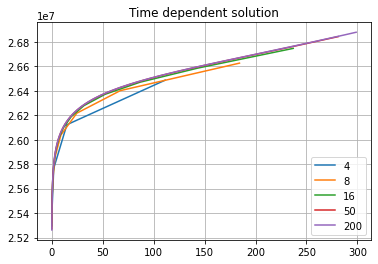

In [27]:
N=[4, 8, 16, 50, 200] #Vary number of grid points
for i in N:
    f=Project(i, dt=20)
    f.plot_ts()
    #print(f.time_solver())

Here we have the solution to the time dependent matrix with different grid points as well as different values for the time step dt. dt=0.01 seems to be too small, as it results in negative values for the pressure. In the exercise file, it says that delta t is given in days. Since we are dealing with a reservoir, during the time gap of 0.01 day, not much changes. In order to get a good sense of the change in pressure, we will therefor need to investigate over a larger delta t for a stable plot. One can also see how the time dependent solution requires higher value of grid points to achive a smooth plot.  

740558.2523501366
594330.268527057
266983.5306966342
98286.43286091089
33863.569670796394
11412.903402823955


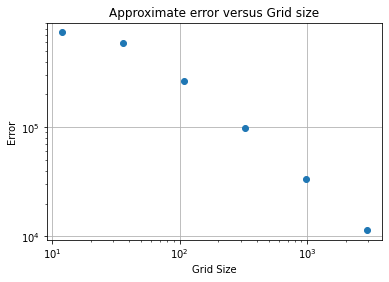

In [28]:
N=[4*3**i for i in range(1,7)]
approx_error=[]
for i in N:
    f=Project(i, dt=2)
    e=f.approx_err() #/100000 #scaling
    print(e)
    approx_error.append(e)
plt.plot(N, approx_error, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Approximate error versus Grid size")
plt.xlabel("Grid Size")
plt.ylabel("Error")
plt.grid()

0.02891578247200452
0.02248742111949509
0.009986365964126097
0.0036622226827370636
0.001260164539460523
0.00042452692082936756


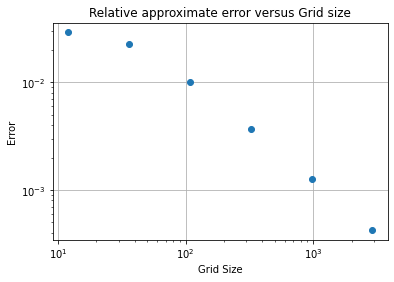

In [29]:
N=[4*3**i for i in range(1,7)]
rel_approx_err=[]
for i in N:
    f=Project(i, dt=2)
    e=f.approx_rel()
    print(e)
    rel_approx_err.append(e)
plt.plot(N, rel_approx_err, 'o')
plt.xscale('log')
plt.yscale('log')
plt.title("Relative approximate error versus Grid size")
plt.xlabel("Grid Size")
plt.ylabel("Error")
plt.grid()

As mentioned, when investigated the approximated numerical error, we take advantage of the difference of two points. Accordingly, the error decreases linearly with a factor of 10, by increasing the grid size.  

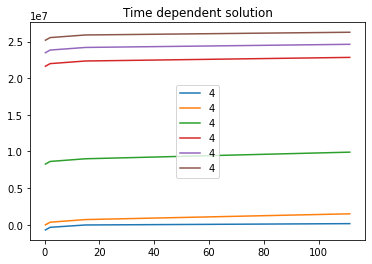

In [30]:
#Small delta t and small N, = bad
dt=[0.001, 0.01, 0.1, 1, 2, 10]
for i in dt:
    f=Project(4, i)
    f.plot_ts()

### Exercise 3: Accuracy and performance of time-dependent solution

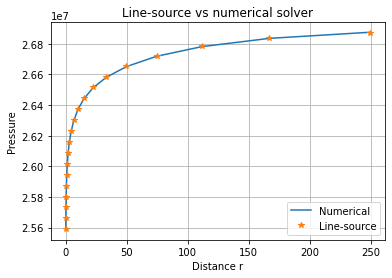

-0.5582867070397813


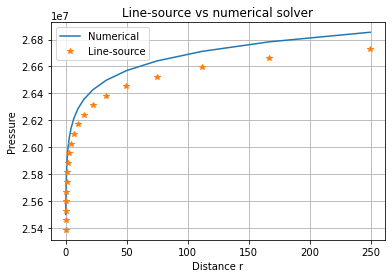

16.604276206512615


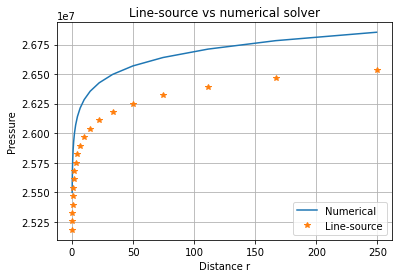

46.15771407461278


In [31]:
N=20
dt=.01
typ="sparse"
t=[.1,1,10]

for i in t:
    testings=Project(N, dt, typ, tfinal=i)
    testings.pressure_solver(plot=True)

Note that the numerical solution assumes that the reservior is infinitely long, and the pressure at the end of the reservior never drops. When dt increases because of the boundary conditions varying for our analytical solution, the analytical solution will peak higher than that of the line equation solution which is to be expected as the numerical solution scales minimal for dt. As a consequence for low dt the models fit very well.

### Exercise 4 part 3

In [276]:
#%%timeit
import timeit

j=[4,10,20,40,80,160,240]
k=['numpy','sparse','thomas']
for r in j:
    for u in k:
        print("N=",r,"Method=",u)
        pint=3900   
        p_old1=np.repeat(pint,r)   
        testings=Project(N=r, dt=0.01, typ=u, tfinal=.1)   
        print ("The time taken is") 
        %timeit testings.time_solver(p_old=p_old1)

N= 4 Method= numpy
The time taken is
7.05 µs ± 460 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
N= 4 Method= sparse
The time taken is
161 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
N= 4 Method= thomas
The time taken is
14.1 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
N= 10 Method= numpy
The time taken is
7.43 µs ± 89.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
N= 10 Method= sparse
The time taken is
162 µs ± 857 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
N= 10 Method= thomas
The time taken is
24.7 µs ± 190 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
N= 20 Method= numpy
The time taken is
13.4 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
N= 20 Method= sparse
The time taken is
169 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
N= 20 Method= thomas
The time taken is
42.5 µs ± 543 ns per loop (mean ± std. dev. of 7 runs, 10000 loops e

When N beacomes larger than 80, numpy becomes very slow. 

### Exercise 4 part 3

<ipython-input-45-e0b81d64bf8d>:257: RuntimeWarning: divide by zero encountered in true_divide
  press_line=(self.pi_)+self.const*sc.expi(-(self.r[0]*self.r[0])/(4*self.diffusivity_*time_plot))


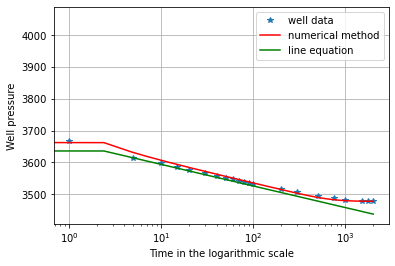

In [48]:
N=40
dt=.1
typ= "thomas"##### thomas used because it is the fatest at N= 40 based on info from 3 part 2 
#Change the values of k, re and pint to match the well data. 
re=6800
pint=4058
k=218
testings=Project(N, dt, typ,re=re,pint=pint,k=k,tfinal=250/3)#####time used in 2000h which is approximately 83.33333days
testings.plot_well(plot_well=True)

In [70]:
#Size of the reservoir: 
#Reservoir - cylinder, area : 2pihr + 2pir^2
#volume : pi r^2 h [m^3]
#According to the 
h=11*0.3048
V=np.pi*re**2*h
print('Total volume of water in the reservoir is', np.round(V*0.03, 3), 'm^3')

Total volume of water in the reservoir is 14611560.501 m^3


Comment by Marianne Udtian: This project was way more challanging than the preveous one. I really did not like the consept with classes at first. I thought it was messy, confusing, and just overall extremely unessesary. Throughout the project, me and classes have really become good friends. I also think that this was a very large project, that really challanged my ability to program, but it also helped me improve my programming skills. Non further comments from me, besides I appreciate the detailed feedback on the last project. Also, it would have been great if the student assistence had a proposed solution or something, (or at least the exercise file) so they could actually help or give us a guideline when we needed it. 

Comment by Marius Skårdal: This was one of the most demanding projects I have worked on in a good way, it was intruiguing from the moment i started working on it. The project was thought out well and there is nothing else for me to criticize besides the time it takes to complete the project, I think the project is slightly too large for two weeks (yes we got three), but there is a lot of trial and error.

Reflection: by Fisayo The project was insightful on how models can be created to simulate physical events, I understand how physical events can be represented mathematical using matrices, I also about numpy vectorization and how this can make coding easier due to the mechanism on which numpy runs on. Classes are quite good, I see their use and how they help avoid code repetition()functions and variables),( They are time consuming to design for starters). We also get to understand how boundary conditions play a vital role when designing the numerical solutions. Overall I feel the project is good but it is extremely time consuming.

## References
[1] Singiresu S. Rao, Applied Numerical Methodes For Engineers And Scientists, University of Miami, Florida, 2002
[2] A. Hiorth, "Finite differences", University of Stavanger, 2022
[3] https://en.wikibooks.org/wiki/Introduction_to_Numerical_Methods/Measuring_Errors
[4] https://www.cs.auckland.ac.nz/courses/compsci369s1c/lectures/GG-notes/Z-archive2010/CS369-FDM-FEM.pdf